# Python | Costco Sales Analysis 

<h2> Objective 

In the following dataset, I will answer the following questions:

1. What is the overall sales trend?
2. What are the top 10 products by sale?
3. Which are the most selling products?
4. Which is the most preferred ship mode?
5. Which are the most profitable category and sub-category? 

<h2> Import Libraries 

In [3]:
# Make sure to run this cell otherwise remaining cells will generate error. 
import pandas as pd
import matplotlib.pyplot as plt

#enables visualizations to be displayed on notebook interface. 
%matplotlib inline

import seaborn as sns

<h2> Import Dataset

In [5]:
# Importing dataset. Make sure to place folder on Desktop. 
df = pd.read_csv('Costco_SuperStore_Sales_Dataset.csv')

<h2> Data Audit 

It is essential to develop a general understanding for any form of data you will analyze. In my current role at Costco, I review the BI Report Hotsheet daily which displays a list of new and low stock items in transit. Then, I must head to the floor and create a mental visualization on where these items will be placed. I coordinate with the stockers so that they begin making the arrangements necessary early in the day before we unload the shipment. Every second counts and everything must be in place ready to go so that we may hit the ground running. The purpose of this is to demonstrate the benefits of analyzing data ahead of time rather than taking action without a plan. 

For the purpose of this project, some factors to seek out for are missing values, outliers, data types, records etc. We will begin analyzing the beginning of this dataset. 

In [11]:
# First 5 rows of dataset. 
# head is a method which required parenthesis. 
df.head()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN
3,3074,CA-2019-125206,03-01-2019,05-01-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,NaN,Online,NaN,NaN
4,8604,US-2019-116365,03-01-2019,08-01-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,NaN,Online,NaN,NaN


Notice row 0 contains an order date of 01-01-2017, and the ship date contains 07-01-2019. This type of insight can develop questions if there are any concerns as to why it was shipped months after, are there any delays that one must look into with the vendor? etc.

Now lets take a look at the last five rows. 

In [12]:
df.tail()

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
5896,907,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",213.136,4,12.1176,NaN,COD,NaN,NaN
5897,1297,CA-2020-115427,30-12-2020,03-01-2021,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",295.904,2,4.5188,1.0,Online,NaN,NaN
5898,5092,CA-2020-156720,30-12-2020,03-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,Office Supplies,Fasteners,Bagged Rubber Bands,388.024,3,-0.6048,NaN,Online,NaN,NaN
5899,909,CA-2020-143259,30-12-2020,03-01-2021,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,462.776,3,19.7910,NaN,COD,NaN,NaN
5900,5093,CA-2020-151450,31-12-2020,04-01-2021,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,Office Supplies,Fasteners,Bagged Rubber Bands,2975.510,3,-0.6048,NaN,COD,NaN,NaN


Notice how it does not display the total number of rows nor columns. To display the following information, we must use the shape attribute. 

In [13]:
# Review total number of rows and columns. 
# shape is an attribute which does not require parenthesis. 
df.shape

(5901, 23)

In [14]:
# Review the columns present in the dataset. 
df.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Returns', 'Payment Mode', 'ind1',
       'ind2'],
      dtype='object')

In [15]:
# Review the summary of the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


In [16]:
# Review missing values 
df.isnull().sum()

Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64

We can see that Returns contain 5614 missing values, ind1 and ind2 contain 5901 missing values. 

In [23]:
# Review descriptive statistics summary 
df.describe().round()

,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns,ind1,ind2
count,5901.0,5901.0,5901.0,5901.0,287.0,0.0,0.0
mean,5022.0,265.0,4.0,30.0,1.0,NaN,NaN
std,2878.0,474.0,2.0,260.0,0.0,NaN,NaN
min,1.0,1.0,1.0,-6600.0,1.0,NaN,NaN
25%,2486.0,72.0,2.0,2.0,1.0,NaN,NaN
50%,5091.0,129.0,3.0,9.0,1.0,NaN,NaN
75%,7456.0,265.0,5.0,29.0,1.0,NaN,NaN
max,9994.0,9100.0,14.0,8400.0,1.0,NaN,NaN


<h2> Exploratory Data Analysis 

<h4> 1. What is the overall sales trend? 

Before we answer this question, we must have an idea what time frame this question will cover. 

In [21]:
df ['Order Date'].min()

'01-01-2019'

In [22]:
df ['Order Date'].max()

'31-12-2020'

Based on the results, we can see that it will range from January 01, 2019 to December 31, 2020. The dates are ordered as day, month, year. It is important to be aware of this as providing the correct insight to shareholders is crucial. 

Now we must obtain the month and year only from the dataset to create a better view of the sales trend. We will use the lamba function with the apply method to create a new column called 'month_year'. 

However, keep in mind that the 'strftime' method is used for formatting datetime objects, not strings. Thus, we must complete this first before we proceed to create a column of month and year only. 

In [31]:
# Convert string in 'Order Date' to datetime object. 
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

# Create a new column 'month_year' with formatted date
df['month_year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

In [32]:
df['month_year']

0       2019-01
1       2019-01
2       2019-01
3       2019-01
4       2019-01
         ...   
5896    2020-12
5897    2020-12
5898    2020-12
5899    2020-12
5900    2020-12
Name: month_year, Length: 5901, dtype: object

Alright, now that we formatted the dates we must attach the sales trend which we will do with the following snippet. 

Since there are Null values in the sales column we must execute 'coerce' which handles non-numeric values by converting them to NaN. 

'.reset_index()' will structure it into the dataframe format. 

In [48]:
# Convert 'sales' column to numeric
df['sales'] = pd.to_numeric(df['Sales'], errors='coerce')  

# Grouping 'month_year' by sales
df_trend = df.groupby('month_year')['Sales'].sum().reset_index()

In [ ]:
df_trend

One observation we can make is from August 2020 to September 2020 there was a $42,000 (20 PERCENT) increase in sales! Another increase from October 2020 to December 2020. Could it have been a surge in the level of panic related to Covid (COVID-19) pandemic? We'll leave that for another time but it is a crucial factor to consider. Face masks were mandatory by many facilities, Lysol and disenfectant materials were needed as many were concerned for their health and their familiy. 


How did we get the profit you ask? 

August-September

• Add the two sales together that you seek to measure: 77338 + 119803 = 197141

• Divide those two individually by the total you acquired: 77338/197141 = .39, 119803/197141 = .60

• Now subtract those two decimals and you will obtain your percentage: .60 - .39 = .20



October-December 

• 88896 + 130960 + 166185 = 386041

• 88896/386041 = .23, 130960/386041 = .33, 166185/386041 = .43

• .10 + .10 ANOTHER 20 PERCENT! 

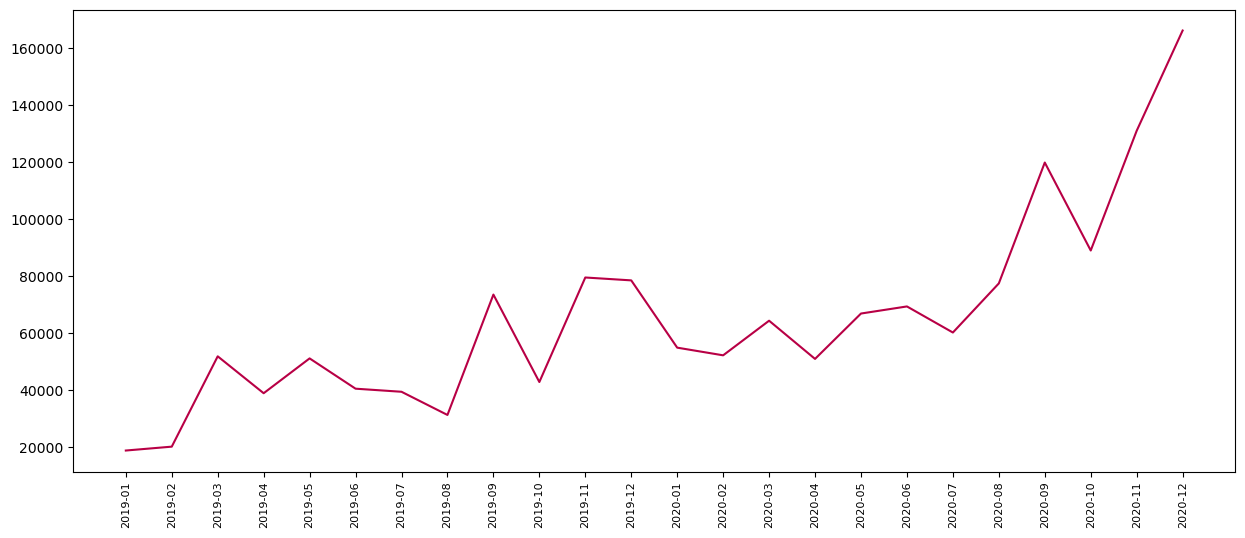

In [70]:
# Setting the figure size
plt.figure(figsize=(15, 6))
plt.plot(df_temp['month_year'], df_temp['Sales'], color='#b80045')
plt.xticks(rotation='vertical', size=8)
plt.show()

<h4> 2. What are the top 10 products by sale?

For this section, we will need the 'Sales' and 'Product Name' columns. Friendly reminder that Python is case sensitive so ensure to type it exactly as it is displayed on the dataframe. 

In [91]:
# Convert 'Sales' column to numeric type
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')

# Grouping product name and sales
prod_sales = pd.DataFrame(df.groupby('Product Name')['Sales'].sum())

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['Sales'], inplace=True, ascending=False)

# Top 10 products by sales
prod_sales[:10]


,Sales
Product Name,
"3D Systems Cube Printer, 2nd Generation, Magenta",14333
Canon imageCLASS 2200 Advanced Copier,14072
Hewlett Packard LaserJet 3310 Copier,13832
GBC DocuBind TL300 Electric Binding System,12886
GBC DocuBind P400 Electric Binding System,12575
Samsung Galaxy Mega 6.3,12366
Martin Yale Chadless Opener Electric Letter Opener,12267
HON 5400 Series Task Chairs for Big and Tall,11885
Global Troy Executive Leather Low-Back Tilter,10215


We can make a note of these hot seller items. Nevertheless, customers may leave reviews under the comment section for these items. But if you want to go above and beyond do the following: 

Continue the search on Social Networks with a hashtag. For example, navigating to Twitter and searching '#CanonCopier. We Scarping can be a useful tool to complete this task if needed. This will generate a wealth of comments from all over the world for complaints/appreciation etc. This feedback will allow us to determine if an item is worth maintaining or directing us to contact the vendor to prevent future complaints. There are other marketing strategies that we can gather and offer to managers/shareholders. 

<h4> 3. Which are the most selling products? 

In [8]:
# Convert 'Quantity' column to numeric type
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Grouping product name and quantity
most_sold_product = pd.DataFrame(df.groupby('Product Name')['Quantity'].sum())

# Sorting the dataframe in descending order
most_sold_product.sort_values(by=['Quantity'], inplace=True, ascending=False)

# Top 10 products by sales
most_sold_product[:10]

,Quantity
Product Name,
Staples,124
Easy-staple paper,89
Staple envelope,73
Staples in misc. colors,60
Chromcraft Round Conference Tables,59
Storex Dura Pro Binders,49
"Situations Contoured Folding Chairs, 4/Set",47
"Wilson Jones Clip & Carry Folder Binder Tool for Ring Binders, Clear",44
Avery Non-Stick Binders,43


We have now generated the most selling items. It is important to keep up with these items and those that generate the most profit. If inventory supply are low then this will result in zero sales and unhappy members. There are many promotion strategies that we can seek out to boost the sales. Another factor we must also consider is the "number of transactions"

For example, if someone purchased a bulk of one specific item in January but the rest of the year people dont usually buy. This is something important to discuss and come up with solutions based on the scenario. 

<h4> 4. Which is the most preferred ship mode?

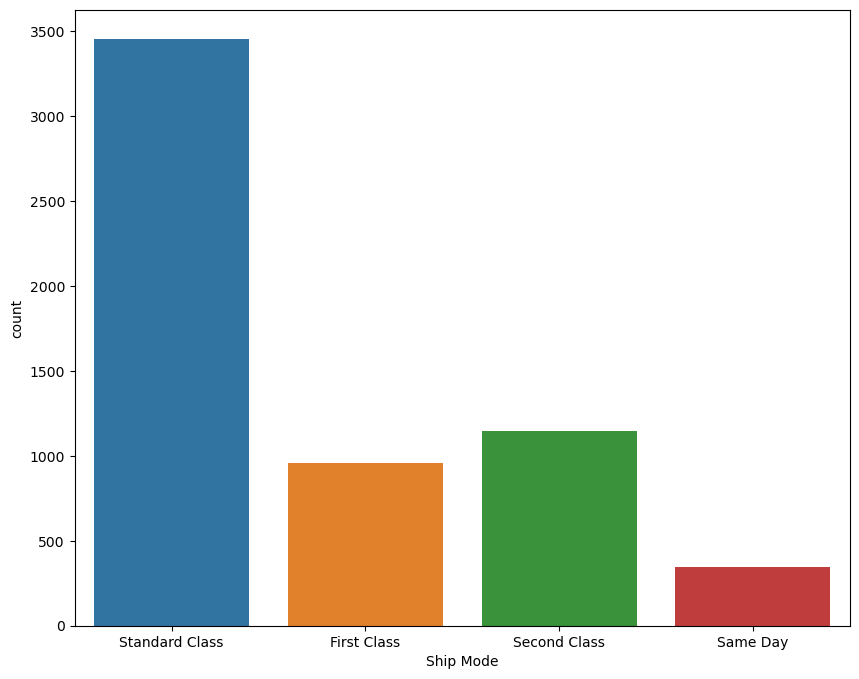

In [14]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='Ship Mode', data=df)

# Display the figure
plt.show()

Standard class is the most preferred ship mode. 

<h4> Which are the most profitable category and sub-category?

In [16]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['Category', 'Sub-Category']).sum()['Profit'])

# Sorting the values
cat_subcat.sort_values(['Category','Profit'], ascending=False)

Profit
Category        Sub-Category            
Technology      Copiers       42774.5828
                Accessories   25336.6455
                Phones        22308.9179
                Machines         38.1024
Office Supplies Paper         21112.3779
                Binders       17885.3759
                Storage       13607.0875
                Appliances    13166.6098
                Art            3635.9257
                Envelopes      3508.5073
                Labels         2937.2212
                Fasteners       598.4175
                Supplies      -1654.2767
Furniture       Chairs        13406.7032
                Furnishings    8034.4328
                Bookcases      -342.8883
                Tables       -11091.6365

In [ ]:
In conclusion, we have answered the following questions.